In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
from collections import Counter
from sklearn import preprocessing
import scipy
import statsmodels.api as sm
from statsmodels.formula.api import ols
sns.set_context("talk")

/home/frank/miniconda3/envs/springboard/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
ls data

crime_astros_finalA.csv*   crime_rockets_finalB.csv*  crime_texans_final.csv*
crime_astros_finalB.csv*   crime_rockets_final.csv*   crime_uh_finalA.csv*
crime_astros_final.csv*    crime_ru_finalB.csv*       crime_uh_finalB.csv*
crime_dynamo_finalA.csv*   crime_ru_final.csv*        crime_uh_final.csv*
crime_dynamo_finalB.csv*   crime_ru_final.csvA.csv*   Position_Salaries.csv*
crime_dynamo_final.csv*    crime_texans_finalA.csv*
crime_rockets_finalA.csv*  crime_texans_finalB.csv*


In [3]:
path = 'data/crime_uh_finalB.csv'
team = 'UH Football '
df = pd.read_csv(path)
#df.drop(['date','dist_stadium_meadian','premise_mode'],axis=1,inplace=True)
df.drop(['date'],axis=1,inplace=True)

nogame = df.game =='No Game'
df = df[~nogame]


#df.drop(['month','offense_mode'],axis=1,inplace=True) # 807
#df.drop(['month','offense_mode','premise_mode'],axis=1,inplace=True) # 424
#df.drop(['month','offense_mode','season'],axis=1,inplace=True) # 795
#df.drop(['offense_mode','season',],axis=1,inplace=True) # 866
#df.drop(['offense_mode','dist_stadium_meadian'],axis=1,inplace=True) # 859
#df.drop(['weekday','dist_stadium_meadian'],axis=1,inplace=True) # 819
#df.drop(['weekday','dist_stadium_meadian','premise_mode'],axis=1,inplace=True) # 500
#df.drop(['offense_mode','dist_stadium_meadian','premise_mode'],axis=1,inplace=True) # 469
#df.drop(['offense_mode','premise_mode','season','dist_stadium_meadian'],axis=1,inplace=True) # 469
#df.drop(['offense_mode','season','premise_mode'],axis=1,inplace=True) # 470
#df.drop(['premise_mode','offense_mode'],axis=1,inplace=True) # 470
#df.drop(['weekday','dist_stadium_meadian','premise_mode'],axis=1,inplace=True) #  500

In [4]:
df.head()

,crime_total,weekday,month,year,dist_stadium_meadian,season,part_day_mode,hour_mode,premise_mode,offense_mode,game
217,2,Saturday,Sep,2010,0.698696,Autumn,Afternoon,9,house,Aggravated Assault,Won Game
223,5,Friday,Sep,2010,0.549023,Autumn,Afternoon,6,driveway,Theft,Won Game
238,4,Saturday,Sep,2010,0.688997,Autumn,Night,0,house,Aggravated Assault,Won Game
249,6,Saturday,Oct,2010,0.933764,Autumn,Afternoon,14,hospital,Aggravated Assault,Lost Game
274,5,Friday,Nov,2010,0.781899,Autumn,Evening,17,apartment,Aggravated Assault,Lost Game


In [5]:
print(df.head())

     crime_total   weekday month  year  dist_stadium_meadian  season  \
217            2  Saturday   Sep  2010              0.698696  Autumn   
223            5    Friday   Sep  2010              0.549023  Autumn   
238            4  Saturday   Sep  2010              0.688997  Autumn   
249            6  Saturday   Oct  2010              0.933764  Autumn   
274            5    Friday   Nov  2010              0.781899  Autumn   

    part_day_mode  hour_mode premise_mode        offense_mode       game  
217     Afternoon          9        house  Aggravated Assault   Won Game  
223     Afternoon          6     driveway               Theft   Won Game  
238         Night          0        house  Aggravated Assault   Won Game  
249     Afternoon         14     hospital  Aggravated Assault  Lost Game  
274       Evening         17    apartment  Aggravated Assault  Lost Game  


In [6]:
### get dummies
dfd = pd.get_dummies(df,drop_first=True)
dfd.columns = [c.replace("'", '') for c in dfd.columns]
dfd.columns = [c.replace(".", '') for c in dfd.columns]
dfd.columns = [c.replace("&", 'n') for c in dfd.columns]
dfd.columns = [c.replace(' ', '_') for c in dfd.columns]
dfd.head()

,crime_total,year,dist_stadium_meadian,hour_mode,weekday_Saturday,weekday_Thursday,month_Dec,month_Nov,month_Oct,month_Sep,...,premise_mode_rest_prk,premise_mode_store,premise_mode_store_prk,premise_mode_street,premise_mode_unk,offense_mode_Auto_Theft,offense_mode_Burglary,offense_mode_Robbery,offense_mode_Theft,game_Won_Game
217,2,2010,0.698696,9,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
223,5,2010,0.549023,6,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,1
238,4,2010,0.688997,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
249,6,2010,0.933764,14,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
274,5,2010,0.781899,17,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
X = dfd.drop(['crime_total'],axis=1)  # predictors

#X = dfd[['dist_stadium_meadian']]
cols = X.columns
formula = '+'.join(list(cols))

y = dfd.crime_total

form = 'crime_total ~'+ formula
#form = 'crime_total ~ hour_mode + year'
m = ols(form,dfd).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:            crime_total   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     3.164
Date:                Wed, 25 Jul 2018   Prob (F-statistic):             0.0127
Time:                        22:49:31   Log-Likelihood:                -92.843
No. Observations:                  47   AIC:                             251.7
Df Residuals:                      14   BIC:                             312.7
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [ ]:
df.head()

## EDA & Summary Statistics

/home/frank/miniconda3/envs/springboard/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


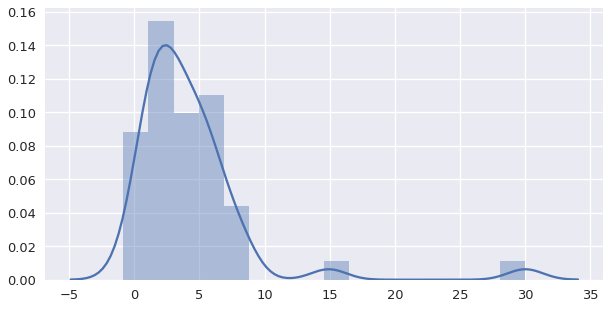

In [8]:
fig,ax = plt.subplots(figsize=(10,5))

sns.distplot(m.fittedvalues)
plt.show()

/home/frank/miniconda3/envs/springboard/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


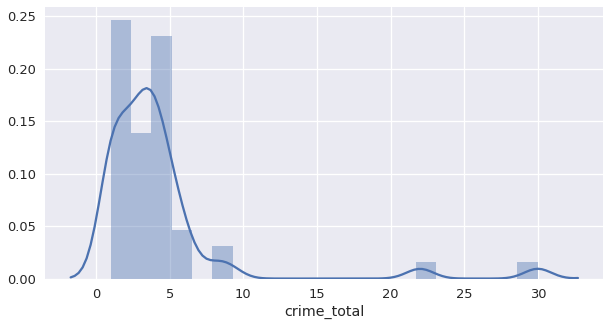

In [9]:
fig,ax = plt.subplots(figsize=(10,5))

sns.distplot(dfd['crime_total'])
plt.show()

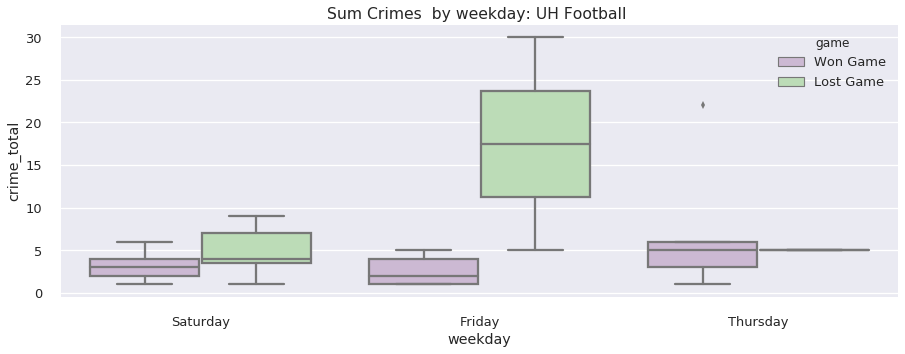

In [10]:
title = 'Sum Crimes  by weekday: {}'.format(team)
fig,ax = plt.subplots(figsize=(15,5))

sns.boxplot(x="weekday", y="crime_total", hue="game", data=df, palette="PRGn")
sns.despine(offset=10, trim=True)
plt.title(title)
plt.savefig(title.replace(' ','_'))


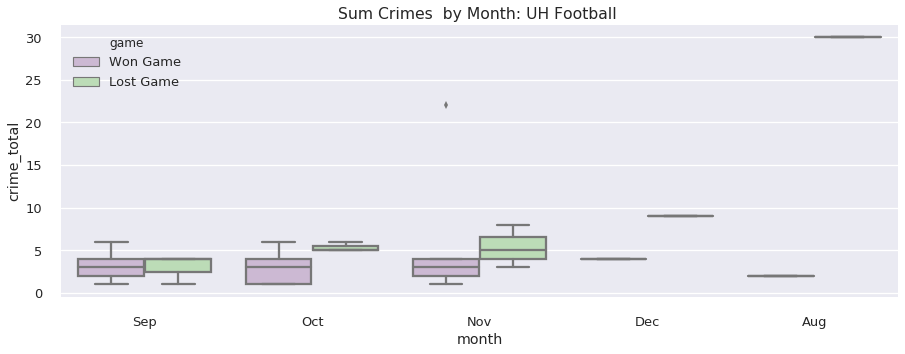

In [11]:
title = 'Sum Crimes  by Month: {}'.format(team)
fig,ax = plt.subplots(figsize=(15,5))

sns.boxplot(x="month", y="crime_total", hue="game", data=df, palette="PRGn")
sns.despine(offset=10, trim=True)
plt.title(title)
plt.savefig(title.replace(' ','_'))
plt.show()

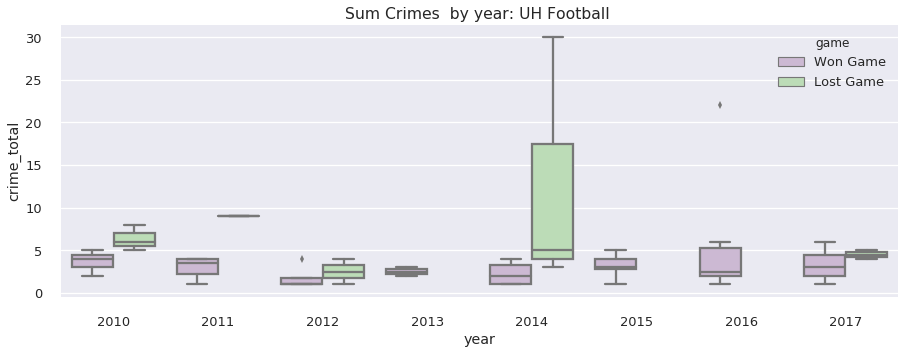

In [12]:
title = 'Sum Crimes  by year: {}'.format(team)
fig,ax = plt.subplots(figsize=(15,5))

sns.boxplot(x="year", y="crime_total", hue="game", data=df, palette="PRGn")
sns.despine(offset=10, trim=True)
plt.title(title)
plt.savefig(title.replace(' ','_'))
plt.show()

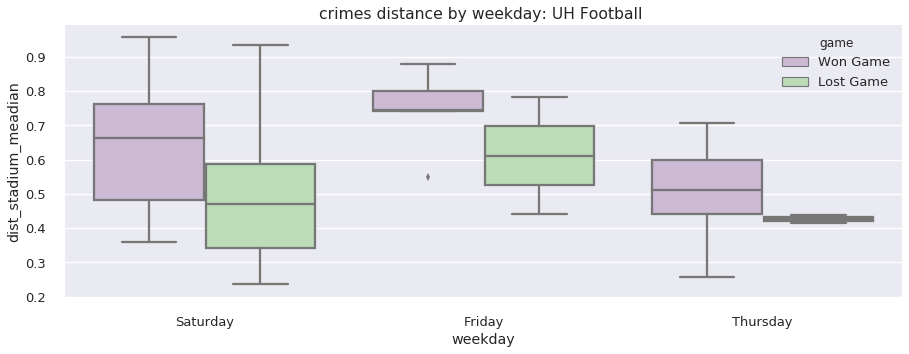

In [13]:
title = 'crimes distance by weekday: {}'.format(team)
fig,ax = plt.subplots(figsize=(15,5))

sns.boxplot(x="weekday", y="dist_stadium_meadian", hue="game", data=df, palette="PRGn")
sns.despine(offset=10, trim=True)
plt.title(title)
plt.savefig(title.replace(' ','_'))
plt.show()

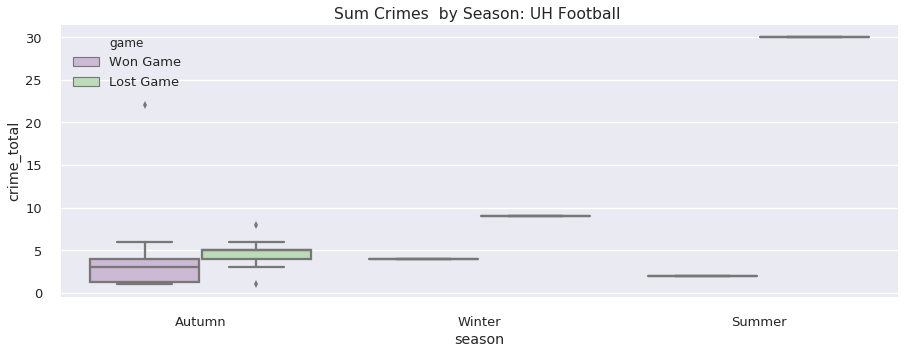

In [14]:
title = 'Sum Crimes  by Season: {}'.format(team)
fig,ax = plt.subplots(figsize=(15,5))

sns.boxplot(x="season", y="crime_total", hue="game", data=df, palette="PRGn")
sns.despine(offset=10, trim=True)

plt.title(title)
plt.savefig(title.replace(' ','_'))
plt.show()

## Relationships

## linear regression

In [ ]:
### get dummies

dfd = pd.get_dummies(df,drop_first=True)
dfd.columns = [c.replace(' ', '_') for c in dfd.columns]
dfd.head()

In [ ]:
X = dfd.drop(['crime_total'],axis=1)  # predictors

#X = dfd[['dist_stadium_meadian']]
cols = X.columns
formula = '+'.join(list(cols))

y = dfd.crime_total





form = 'crime_total ~'+ formula

m = ols(form,dfd).fit()
print(m.summary())

In [15]:
from sklearn import cross_validation, metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso

/home/frank/miniconda3/envs/springboard/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [16]:
alg1 = LinearRegression(normalize=True)
alg2 = Ridge(alpha=0.1,normalize=True)
alg3 = Lasso(alpha=0.1,normalize=True)

In [ ]:
LinearRegression?

In [ ]:
Ridge?

In [ ]:
Lasso?

In [17]:
from sklearn import cross_validation, metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [18]:
def modelfit(alg, X,y):
    '''
    target = y
    predictors = X
    '''
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
    #Fit the algorithm on the data
    alg.fit(X_train,y_train)
    #Predict training set:
    train_predictions = alg.predict(X_train)
    #Perform cross-validation:
    cv_score = cross_val_score(alg, X, y, cv=10, scoring='neg_mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))
    
    #Print model report:
    print ("\nModel Report")
    print( "RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(y_train, train_predictions)))
    print ("CV Score : Mean  %.4g | Std  %.4g | Min  %.4g | Max  %.4g" % \
           (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))

In [19]:
X_cols = list(X.columns)

In [20]:
title

'Sum Crimes  by Season: UH Football '


Model Report
RMSE : 1.077
CV Score : Mean  5.234e+13 | Std  1.317e+14 | Min  3.493 | Max  4.45e+14


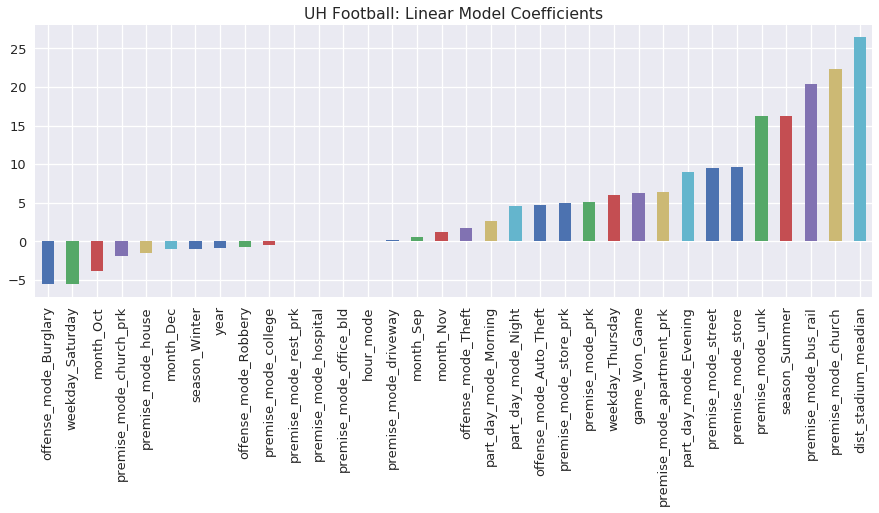

In [44]:
title = 'UH Football: Linear Model Coefficients'
modelfit(alg1,X,y)
coef1 = pd.Series(alg1.coef_, X_cols).sort_values()
coef1.plot(kind='bar', title=title,figsize=(15,5))
plt.savefig(title.replace(' ','_'),bbox_inches="tight")
plt.show()


Model Report
RMSE : 1.704
CV Score : Mean  4.767 | Std  3.785 | Min  1.255 | Max  13.5


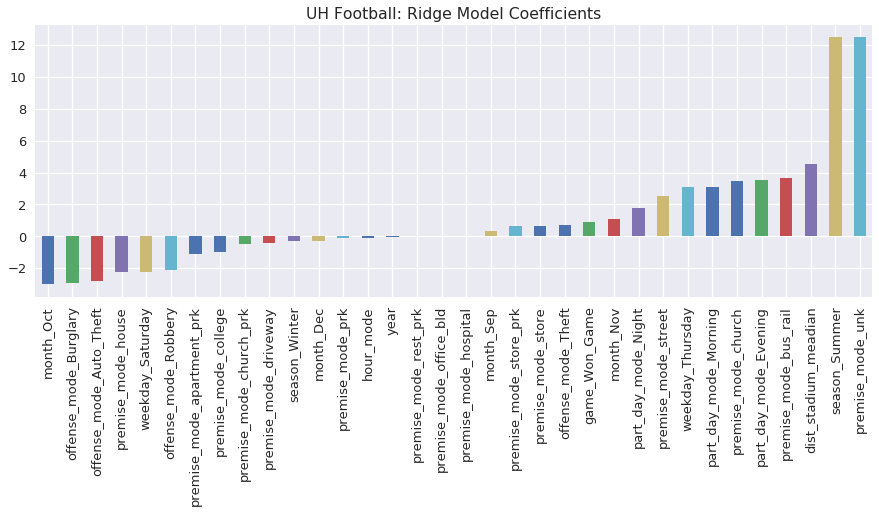

In [47]:
title = 'UH Football: Ridge Model Coefficients'

modelfit(alg2,X,y)
coef2 = pd.Series(alg2.coef_, X_cols).sort_values()
coef2.plot(kind='bar', title=title,figsize=(15,5))
plt.savefig(title.replace(' ','_'),bbox_inches="tight")
plt.show()


Model Report
RMSE : 2.782
CV Score : Mean  4.701 | Std  4.044 | Min  1.393 | Max  12.09


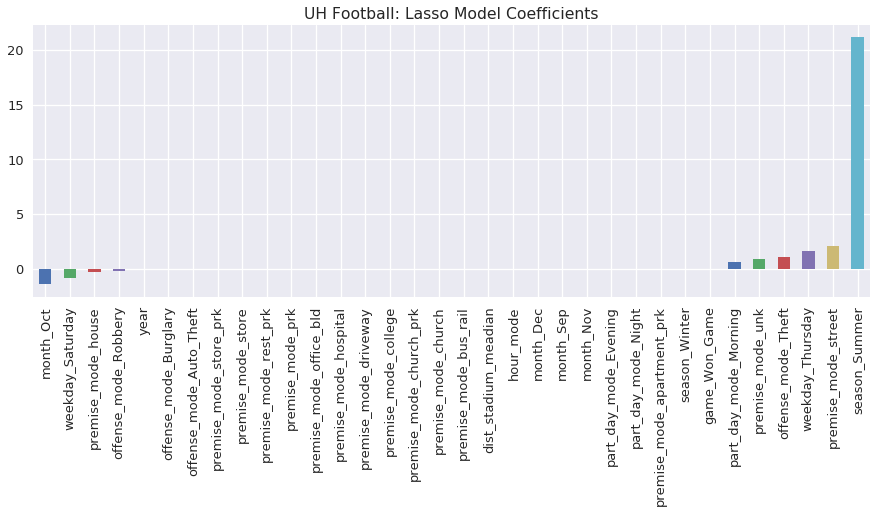

In [46]:


title = 'UH Football: Lasso Model Coefficients'
modelfit(alg3,X,y)
coef3 = pd.Series(alg3.coef_, X_cols).sort_values()
coef3.plot(kind='bar', title=title,figsize=(15,5))
plt.savefig(title.replace(' ','_'),bbox_inches="tight")
plt.show()